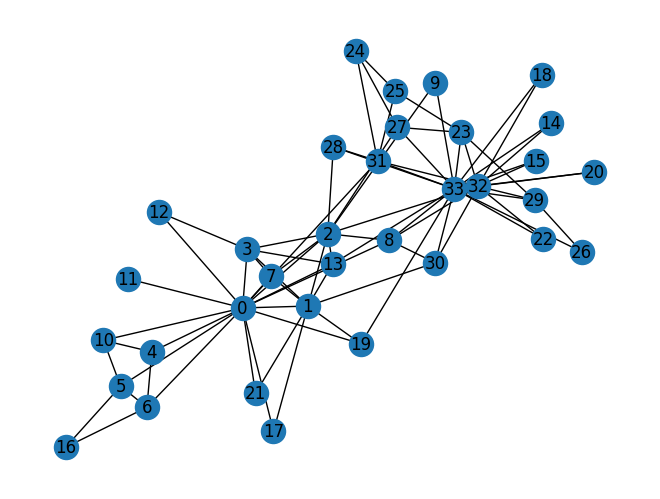

In [8]:
import networkx as nx
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F

# Create a sample graph
G = nx.karate_club_graph()

# Plot the graph
nx.draw(G, with_labels=True)
plt.show()

# Convert graph to PyTorch tensors
edge_index = torch.tensor(list(G.edges()), dtype=torch.long).t().contiguous()
x = torch.ones(G.number_of_nodes(), 1)



In [2]:
print(x.shape)

torch.Size([34, 1])


In [3]:
class GNN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super(GNN, self).__init__()
        torch.manual_seed(12345)
        self.conv1 = nn.Conv1d(34, hidden_channels, 1)
        self.conv2 = nn.Conv1d(hidden_channels, hidden_channels, 1)

    def forward(self, x, edge_index):
        x = self.conv1(x)
        x = x.relu()
        x = F.relu(self.conv2(x))
        return x

In [4]:
model = GNN(hidden_channels=4)
output = model(x, edge_index)

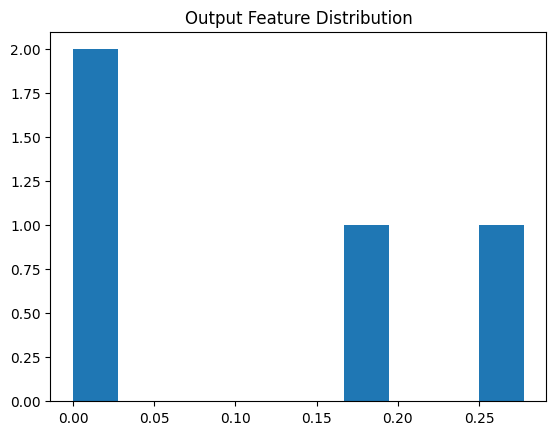

In [5]:
plt.hist(output.detach().numpy())
plt.title('Output Feature Distribution')
plt.show()

In [ ]:
## This code first creates a sample graph using the karate club network from NetworkX.
# It then converts the graph to PyTorch tensors - edge_index contains the connectivity information
# and x contains the initial feature for each node.
# A simple 2-layer GNN model is defined using PyTorch nn.Conv1d layers.
# The model takes the node features x and connectivity edge_index as input.
# It passes x through two convolutional layers with ReLU activations to output node embeddings.
# The model is initialized and run on the sample graph.
# The output is plotted as a histogram to visualize the distribution of learned node embeddings.

## The key steps are:
# Represent graph as tensors
# Define convolution layers
# Pass node features through conv layers
# Output is node embeddings
# This shows the basic working of a graph neural network in PyTorch in a simple way.
# More complex implementations can have deeper models, residual connections, batch normalization etc.
# The same principle of passing features through convolutional layers on graph topology applies.

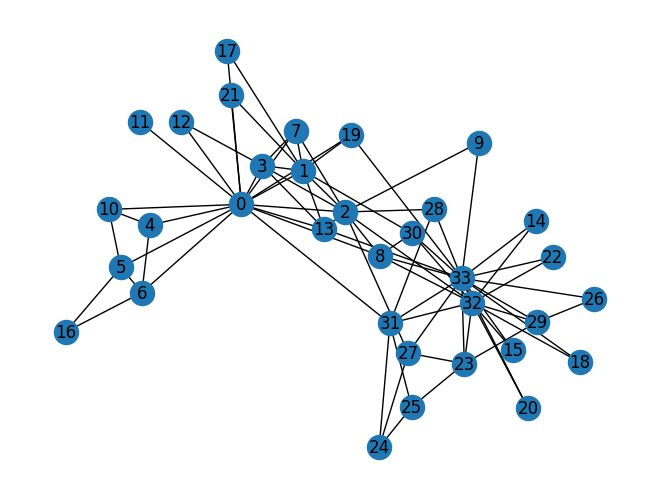

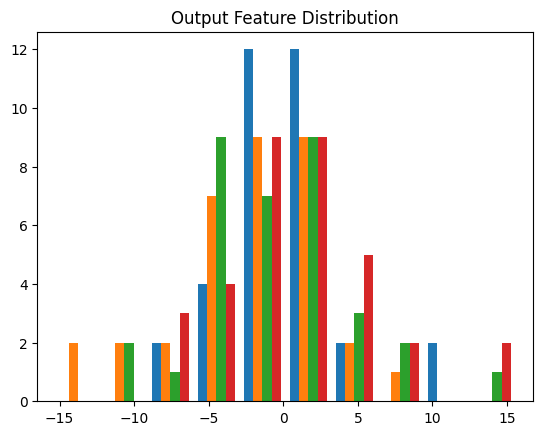

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F

# Create sample graph
G = nx.karate_club_graph()

# Plot graph
nx.draw(G, with_labels=True)
plt.show()  # Use plt.show() instead of plt.savefig()

# Features and adjacency matrix
x = torch.eye(G.number_of_nodes(), dtype=torch.float)  # Set data type to float
A = torch.tensor(nx.to_numpy_array(G), dtype=torch.float)  # Convert to tensor and set data type to float

# GNN Layer
class GNNLayer(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.linear = nn.Linear(in_channels, out_channels)

    def forward(self, x, A):
        x = torch.matmul(A, x)
        x = self.linear(x)
        return x

# Create GNN
class GNN(nn.Module):
    def __init__(self, in_channels, out_channels, num_layers):
        super().__init__()
        self.layers = nn.ModuleList()
        self.layers.append(GNNLayer(in_channels, 8))
        self.layers.append(GNNLayer(8, out_channels))

    def forward(self, x, A):
        for layer in self.layers:
            x = layer(x, A)
        return x

# Train
model = GNN(34, 4, 2)
output = model(x, A)

# Plot output
plt.hist(output.detach().numpy())
plt.title('Output Feature Distribution')
plt.show()  # Use plt.show() instead of plt.savefig()


In [ ]:
# This implements a 2-layer GNN using PyTorch modules and graph convolution.
## The key steps are:
# Create graph and get adjacency matrix
# Define GNN layer to do graph convolution
# Build model with input and output channels
# Train model on graph
# Plot output node embeddings
# The GNNLayer does message passing - multiplying the adjacency matrix with input features.
# The GNN stacks two such layers and trains it end-to-end on the graph.